<a href="https://colab.research.google.com/github/Svhugani/QOptics/blob/main/hamiltionian2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install sympy

In [4]:
from sympy import *
init_printing()

Define real symbolic variables omega, gamma, Beta and "Hamiltionian"

---



In [5]:
omega, gamma_1, gamma_2, Beta = symbols("omega gamma_1 gamma_2 Beta", real = True)
H = Matrix(((omega - I * gamma_1, Beta, 0 ), (Beta, omega, Beta), (0, Beta, omega + I * gamma_2)))

In [6]:
H

⎡-ⅈ⋅γ₁ + ω  Β     0    ⎤
⎢                      ⎥
⎢    Β      ω     Β    ⎥
⎢                      ⎥
⎣    0      Β  ⅈ⋅γ₂ + ω⎦

Let E be Dict of eigenvalues

In [7]:
E = H.eigenvals()

In [8]:
print("Eigenvals of a matrix : {}".format(E)) 

Eigenvals of a matrix : {-I*gamma_1/3 + I*gamma_2/3 + omega - (6*Beta**2 - 3*gamma_1*gamma_2 + 6*I*gamma_1*omega - 6*I*gamma_2*omega - 9*omega**2 + (I*gamma_1 - I*gamma_2 - 3*omega)**2)/(3*(-27*I*Beta**2*gamma_1/2 + 27*I*Beta**2*gamma_2/2 + 27*Beta**2*omega - 27*gamma_1*gamma_2*omega/2 + 27*I*gamma_1*omega**2/2 - 27*I*gamma_2*omega**2/2 - 27*omega**3/2 + sqrt(-4*(6*Beta**2 - 3*gamma_1*gamma_2 + 6*I*gamma_1*omega - 6*I*gamma_2*omega - 9*omega**2 + (I*gamma_1 - I*gamma_2 - 3*omega)**2)**3 + (-27*I*Beta**2*gamma_1 + 27*I*Beta**2*gamma_2 + 54*Beta**2*omega - 27*gamma_1*gamma_2*omega + 27*I*gamma_1*omega**2 - 27*I*gamma_2*omega**2 - 27*omega**3 + 2*(I*gamma_1 - I*gamma_2 - 3*omega)**3 - (9*I*gamma_1 - 9*I*gamma_2 - 27*omega)*(-2*Beta**2 + gamma_1*gamma_2 - 2*I*gamma_1*omega + 2*I*gamma_2*omega + 3*omega**2))**2)/2 + (I*gamma_1 - I*gamma_2 - 3*omega)**3 - (9*I*gamma_1 - 9*I*gamma_2 - 27*omega)*(-2*Beta**2 + gamma_1*gamma_2 - 2*I*gamma_1*omega + 2*I*gamma_2*omega + 3*omega**2)/2)**(1/3)) - (-

Convert dictionary keys (eigenvlaues) to list

In [9]:
eigenValsList = list(E.keys())

e0 - first eigenvalue

In [10]:
e0 = eigenValsList[0]

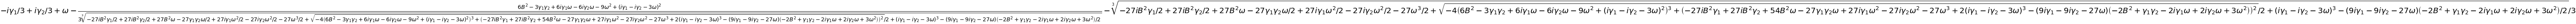

In [11]:
e0

In [12]:
k = symbols("k", real = True)

In [13]:
simp_e0 = e0.subs([(omega,5*Beta), (gamma_2, gamma_1 * k)])

In [14]:
simp_e0 = simp_e0.subs(Beta,1)

Simplified e0:  omega = 5* Beta

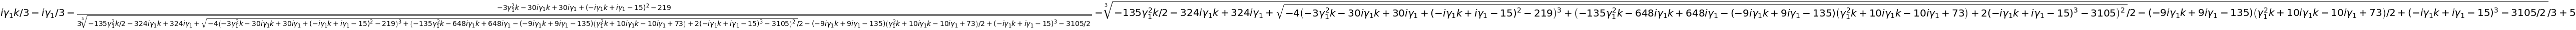

In [15]:
simp_e0

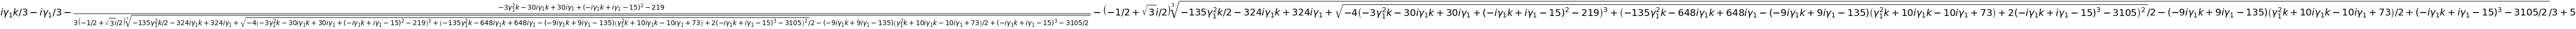

In [16]:
e1 = eigenValsList[1]
simp_e1 = e1.subs([(omega,5*Beta), (gamma_2, gamma_1 * k)])
simp_e1 = simp_e1.subs(Beta,1)
simp_e1

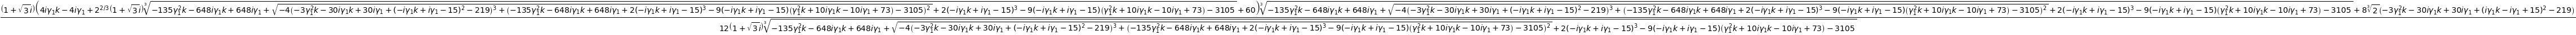

In [17]:
e2 = eigenValsList[2]
simp_e2 = e2.subs([(omega,5*Beta), (gamma_2, gamma_1 * k)])
simp_e2 = simp_e2.subs(Beta,1)
simp_e2.simplify()

**2. Numerical calculations of eigenvalues**

---



num_e0, num_e1 and num_e2 will denote numerlical representations of three eigenvalues withs substitutions: omega = 5*beta, beta = 1, gamma_2 = gamma_1 * k.

For each of the eigenvalues we calculate how much "imaginary it is" versus gamma_1 and k. 

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

def QuantifyImaginaryPart(eigenval, gammaLinSpace, kLinSpace):
  calculatedImagParts = list()
  for i in tqdm(range(len(gammaLinSpace))):
    g_point = gammaLinSpace[i]
    temp = list()
    for k_point in kLinSpace:
      numEigenImag = eigenval.subs(gamma_1, g_point)
      numEigenImag = numEigenImag.subs(k, k_point)
      numEigenImag = abs(im(N(numEigenImag)))
      temp.append(numEigenImag)
    calculatedImagParts.append(temp)

  fig, ax = plt.subplots(figsize=(14, 12))
  img = np.array(calculatedImagParts, dtype = float)
  image_plot = ax.imshow(img, cmap='hot', interpolation='none', extent = [kLinspace[0], kLinSpace[-1], gammaLinSpace[-1], gammaLinSpace[0]], aspect = 'auto')
  fig.colorbar(image_plot)
  plt.show()  
  return img

In [28]:
import matplotlib.pyplot as plt
import numpy as np 


def QuantifyImaginaryPart(eigenval, g_point, k_point):
  numEigenImag = eigenval.subs(gamma_1, g_point)
  numEigenImag = numEigenImag.subs(k, k_point)
  numEigenImag = abs(im(N(numEigenImag)))
  return numEigenImag

def PlotImaginartPart(eigenval, kLinSpace, gLinSpace):
  X, Y = np.meshgrid(kLinspace, gLinspace)
  Z = QuantifyImaginaryPart(eigenval, X, Y)
  fig, ax = plt.subplots(figsize = (12, 14))
  im = ax.imshow(Z, cmap = 'hot', interpolation = 'none', extent = [kLinspace[0], kLinSpace[-1], gLinSpace[-1], gLinSpace[0]], aspect = 'auto')

In [41]:
kLinspace = np.linspace(0, 2, 100)
gLinspace = np.linspace(0, 4, 100)

On all images lower axis (horizontal) is related to parameter k, while vertical axis is related with the gamma_1 parameter. Thus for k=1 we should get equal gainn and loss. 

* 2.A Calculate map for eigenvalue simp_e0 (Beta = 1, omega = 5* Beta, gamma_2 = k* gamma_1. 

100%|██████████| 100/100 [04:07<00:00,  2.47s/it]


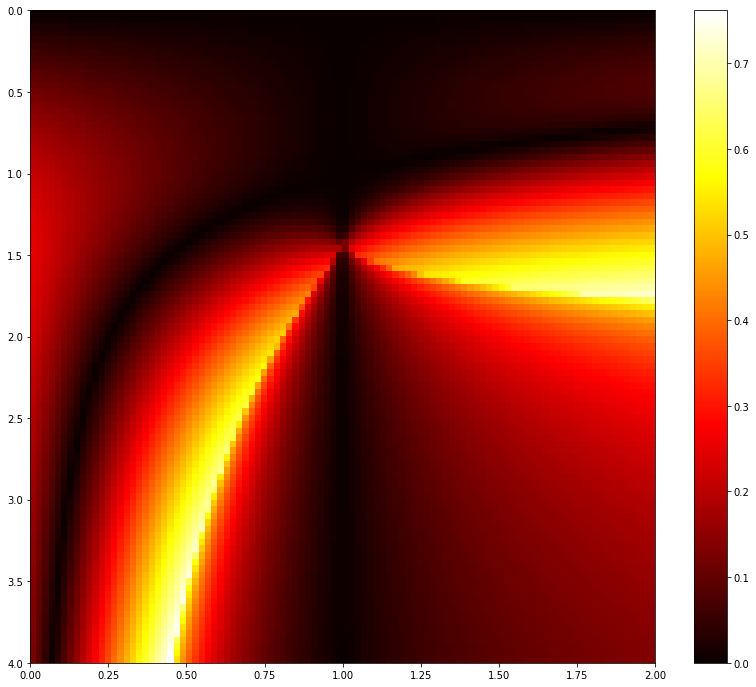

In [35]:
img0 = QuantifyImaginaryPart(simp_e0, gLinspace, kLinspace)

* 2.B Calculate map for eigenvalue simp_e1 (Beta = 1, omega = 5* Beta, gamma_2 = k* gamma_1. 

100%|██████████| 100/100 [04:12<00:00,  2.53s/it]


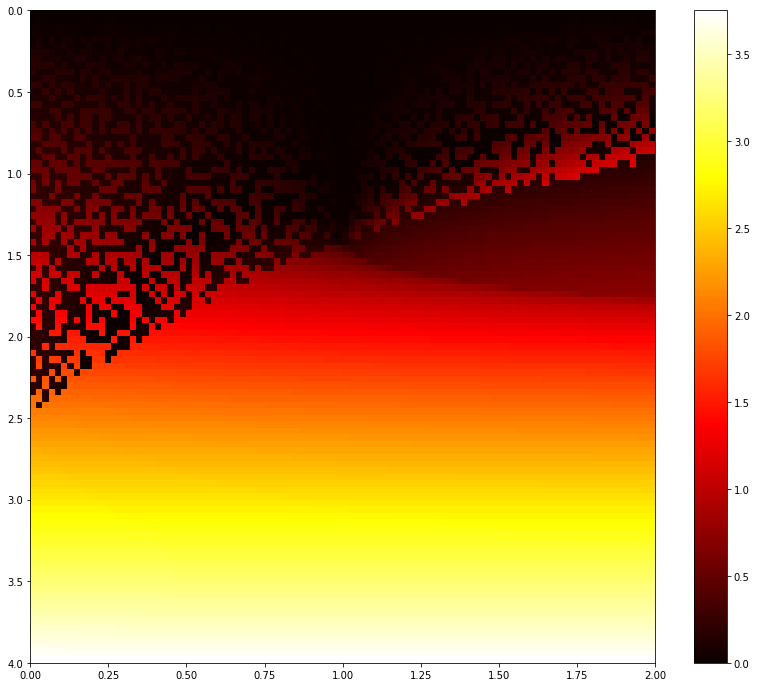

In [36]:
img0 = QuantifyImaginaryPart(simp_e1, gLinspace, kLinspace)

* 2.C Calculate map for eigenvalue simp_e2 (Beta = 1, omega = 5* Beta, gamma_2 = k* gamma_. 

100%|██████████| 100/100 [04:09<00:00,  2.50s/it]


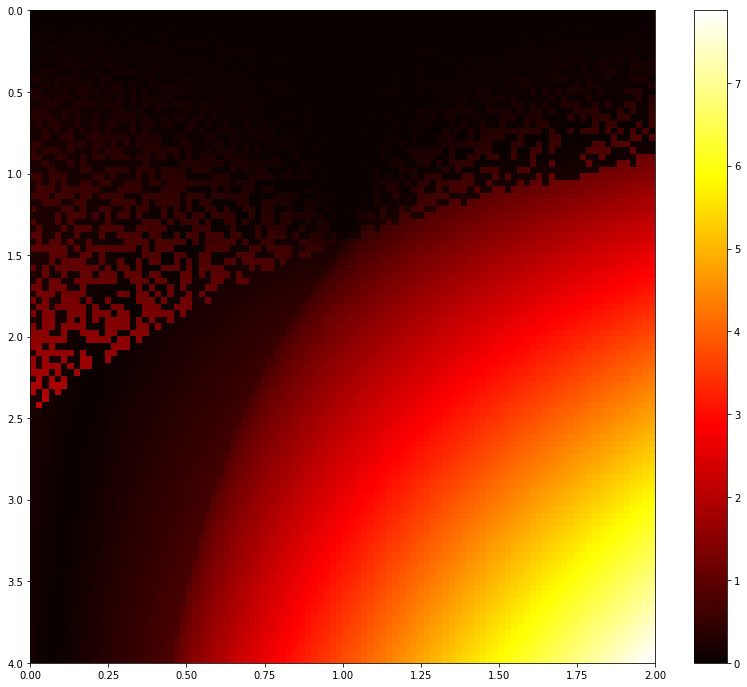

In [38]:
img2 = QuantifyImaginaryPart(simp_e2, gLinspace, kLinspace)

Let't take closer look at 2nd eigen value simp_e1

100%|██████████| 200/200 [17:30<00:00,  5.25s/it]


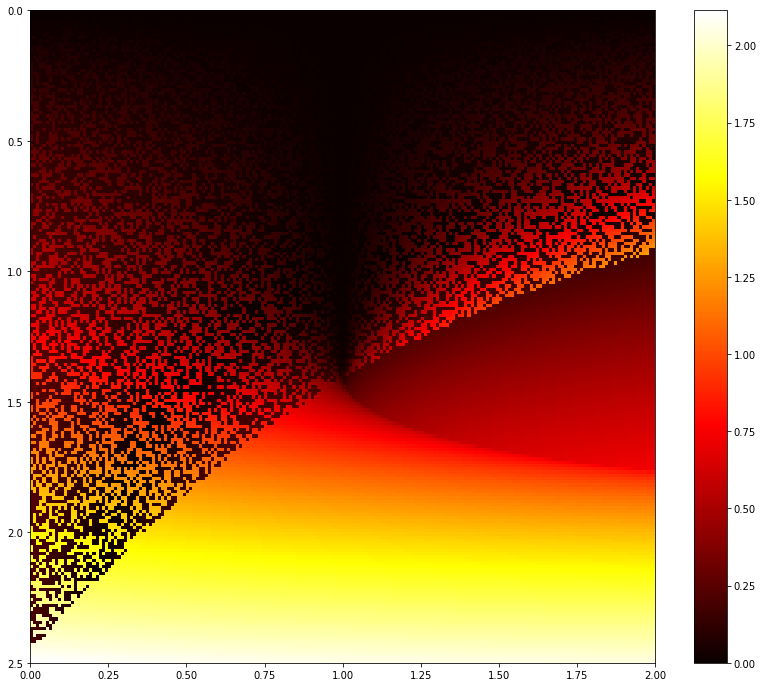

In [40]:
kLinspace2 = np.linspace(0, 2, 200)
gLinspace2 = np.linspace(0, 2.5, 200)
img1_closer = QuantifyImaginaryPart(simp_e1, gLinspace2, kLinspace2)